In [42]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import model_from_json, load_model
from mtcnn.mtcnn import MTCNN
from pathlib import Path as path
import json
from PIL import ImageDraw, ImageFont
from matplotlib import patches, patheffects
import pdb ### Python debuger
import os ### Navigate Through Dirrectory
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections

In [12]:
os.listdir("Models/FaceNet")

['facenet_keras.h5', 'facenet_keras_weights.h5']

In [13]:
model = load_model("Models/FaceNet/facenet_keras.h5")

W0702 15:59:41.279988  9136 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


In [14]:
model.summary()

Model: "inception_resnet_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv2d_1a_3x3 (Conv2D)          (None, 79, 79, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
Conv2d_1a_3x3_BatchNorm (BatchN (None, 79, 79, 32)   96          Conv2d_1a_3x3[0][0]              
__________________________________________________________________________________________________
Conv2d_1a_3x3_Activation (Activ (None, 79, 79, 32)   0           Conv2d_1a_3x3_BatchNorm[0][0]    
________________________________________________________________________________

In [15]:
print(model.inputs)
print(model.outputs)

[<tf.Tensor 'input_1_1:0' shape=(?, 160, 160, 3) dtype=float32>]
[<tf.Tensor 'Bottleneck_BatchNorm_1/batchnorm/add_1:0' shape=(?, 128) dtype=float32>]


In [16]:
os.listdir("pics")

['t.jpg']

In [17]:
img = plt.imread("pics/t.jpg")
pixels = np.asarray(img)

In [20]:
detector = MTCNN()
results = detector.detect_faces(pixels)

In [23]:
print("The number of Faces detected are ",len(results))

The number of Faces detecteda are  2


In [28]:
bb_lst =[]
for i in results:
    bb_lst.append(i["box"])

In [37]:
def show_img(img, figsize=None, ax=None):
    fig, ax = plt.subplots()
    ax.imshow(img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax

### Outline
def outline(ax, lw):
    """
    Outline the passed object with a black border
    """
    ax.set_path_effects([patheffects.Stroke(linewidth =lw , foreground = 'black'), patheffects.Normal()])
###Outline
def draw_bb(ax, b):
    """
    Draws a bounding box around the object 
    """
    patch = ax.add_patch(patches.Rectangle(b[:2], *b[-2:], fill=False, edgecolor = 'white', lw = 2))
    outline(patch, 4)
def write_txt(ax, xy, txt, sz = 14):
    """
    writes text on  th image
    """
    text = ax.text(xy[0], xy[1], txt, verticalalignment = 'top', color = 'white',fontsize = sz, weight = 'bold')
    outline(text, 1)
def showImgWithAnn(image, annotations):
    """
    Displays the image with the bounding box or boxes
    args: 
        image: image in numpy format
        annotaions: List of tuples containing bounding boxes info and category id
    """
    a= show_img(img)
    for b, c in annotations:
        b = bb_hw(b)
        draw_bb(a, b)
        write_txt(a, b[:2], categ[c])

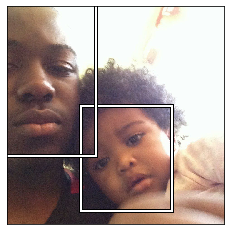

In [45]:
a= show_img(img)
draw_bb(a, bb_lst[0])
draw_bb(a, bb_lst[1])